# Exploratory Data Analysis

This notebook performs EDA of the dataset to understand the patterns and relationships in the data, find out what features are relevant to prediction.

### Data Load 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('bmh')
%matplotlib inline
sns.set()


df = pd.read_csv("../data/cleaned_data.csv")
df.head()

age gender  height  weight  systolic blood pressure  \
0   50    Men     168    62.0                      110   
1   55  Women     156    85.0                      140   
2   52  Women     165    64.0                      130   
3   48    Men     169    82.0                      150   
4   48  Women     156    56.0                      100   

   diastolic blood pressure        cholesterol glucose smoking alcohol  \
0                        80             normal  normal      No      No   
1                        90  well above normal  normal      No      No   
2                        70  well above normal  normal      No      No   
3                       100             normal  normal      No      No   
4                        60             normal  normal      No      No   

  physical activity disease        bmi weight status  
0               Yes      No  21.967120       Healthy  
1               Yes     Yes  34.927679         Obese  
2                No     Yes  23.507805       Healthy  
3               Yes     Yes  28.710479    Overweight  
4                No      No  23.011177       Healthy

In [34]:
df.dtypes

age                           int64
gender                       object
height                        int64
weight                      float64
systolic blood pressure       int64
diastolic blood pressure      int64
cholesterol                  object
glucose                      object
smoking                      object
alcohol                      object
physical activity            object
disease                      object
bmi                         float64
weight status                object
dtype: object

In [35]:
df.describe()

age        height        weight  systolic blood pressure  \
count  64899.000000  64899.000000  64899.000000             64899.000000   
mean      53.352979    164.384166     74.496847               126.982850   
std        6.810819      8.122606     14.526487                17.091237   
min       30.000000    100.000000     30.000000                70.000000   
25%       48.000000    159.000000     65.000000               120.000000   
50%       54.000000    165.000000     72.000000               120.000000   
75%       59.000000    170.000000     82.450000               140.000000   
max       65.000000    250.000000    200.000000               240.000000   

       diastolic blood pressure           bmi  
count              64899.000000  64899.000000  
mean                  81.446802     27.618512  
std                    9.749381      5.435406  
min                   40.000000     10.726644  
25%                   80.000000     23.875115  
50%                   80.000000     26.573129  
75%                   90.000000     30.457656  
max                  140.000000    152.551775

### Visualizations

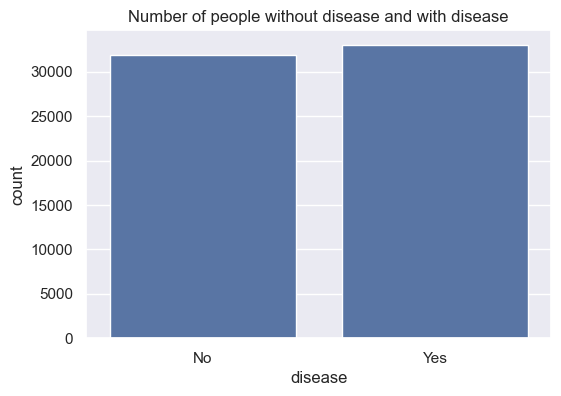

In [36]:
plt.figure(figsize=(6,4)) #controls the size of the figure
sns.countplot(data = df, x = 'disease')
plt.title("Number of people without disease and with disease")
plt.show()

#### **Observations**

- Classes for No disease and Yes disease are approximately equal; the classes are balanced sizes and we can use accuracy among others to check for model "correctness". https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall
- Here the cost of false negative is higher than the cost of false positives, we would rather predict disease in someone without (False positive) than to predict they have no disease when they do (False negative).
- Now we can visualize counts for numerical attributes and counts of categories for categorical attributes to see any relationship with the target variable (disease).

Index(['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol',
       'physical activity', 'disease', 'weight status'],
      dtype='object')


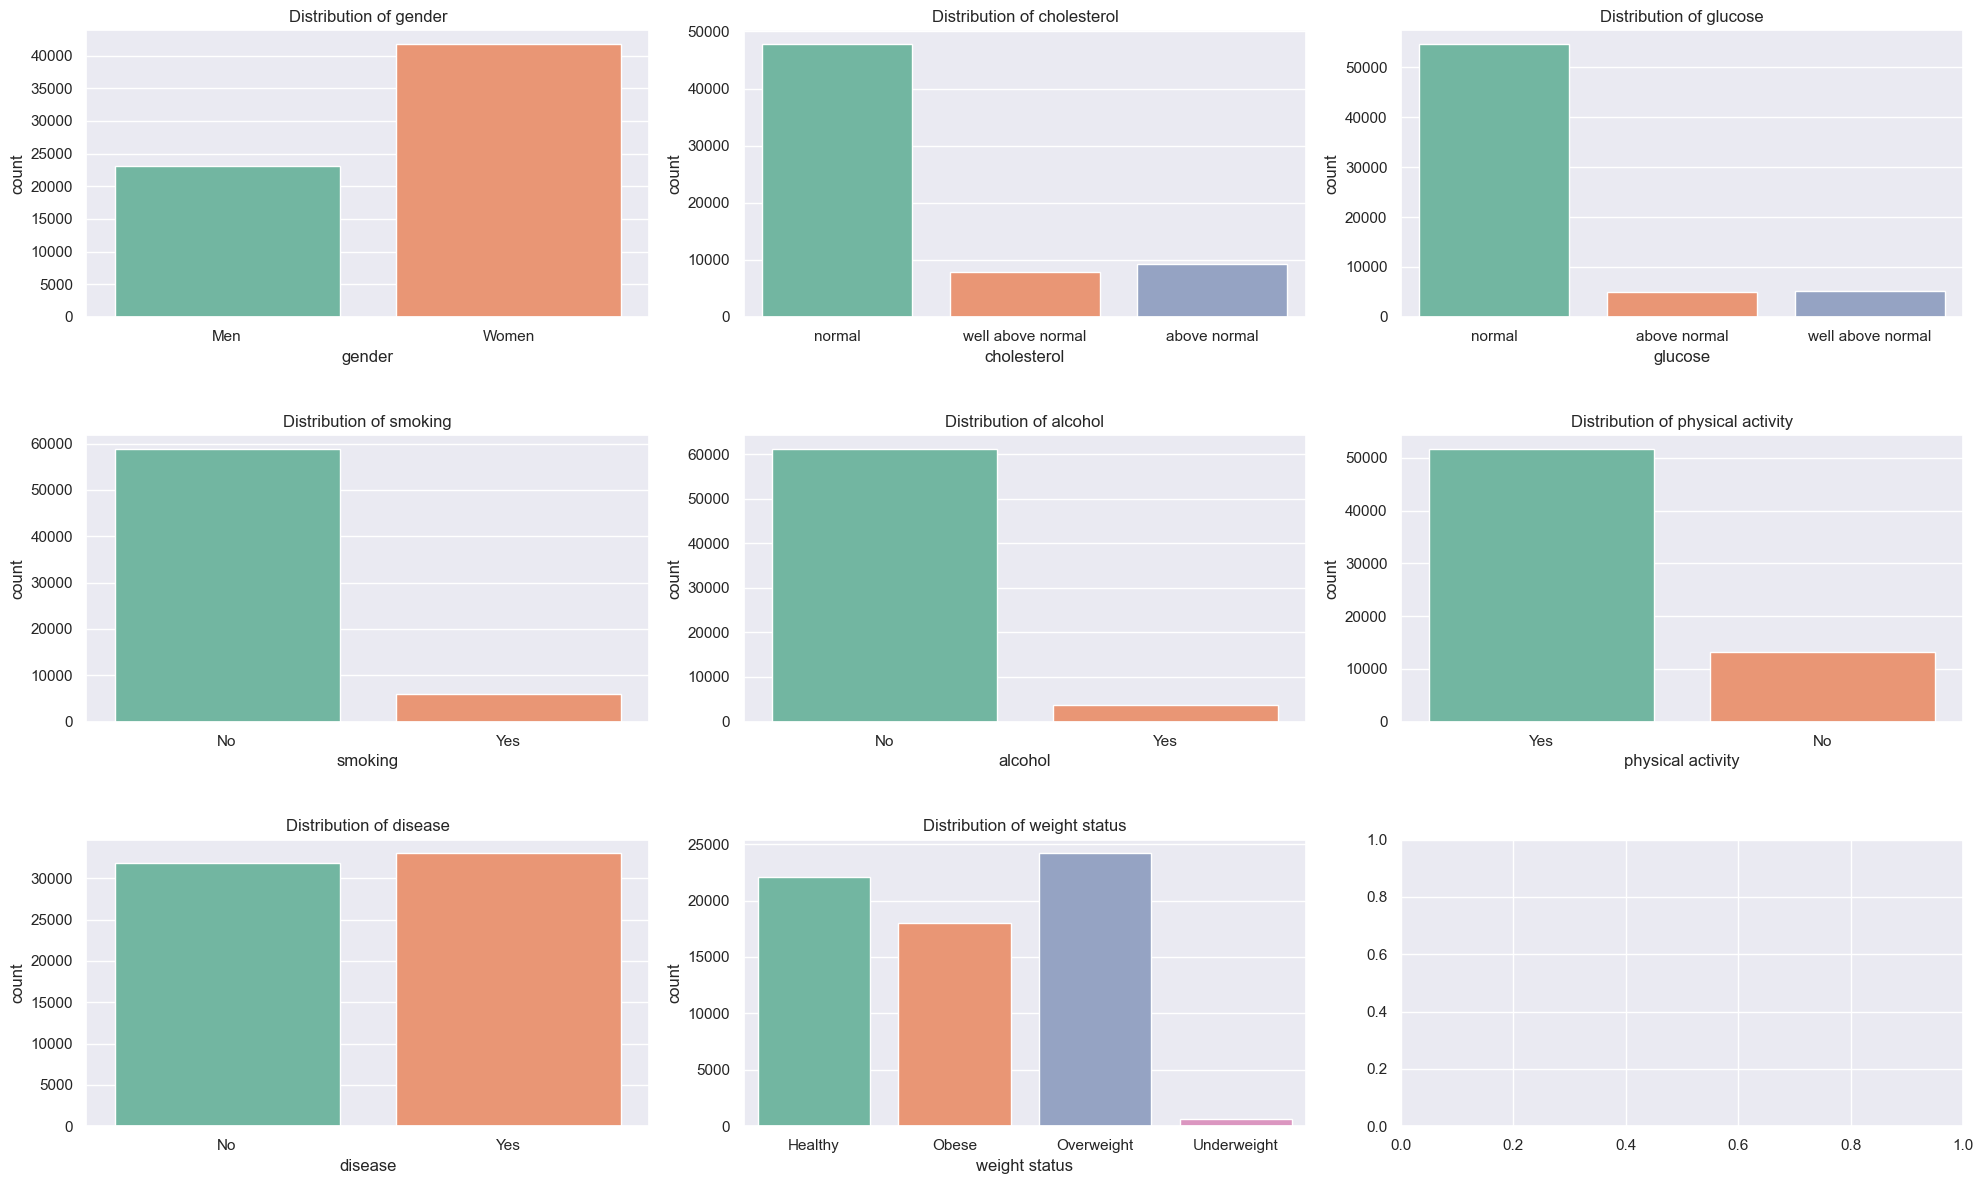

In [37]:
df_classes = df.select_dtypes(include = object).columns
print(df_classes)
colors = ['red', 'orange']

fig, axes = plt.subplots(3, 3, figsize=(20, 12))
axes = axes.flatten() 
for i, col in enumerate(df_classes):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='Set2', legend=False)
    axes[i].set(title = f"Distribution of {col}")
plt.tight_layout(h_pad = 3)
plt.show()

### Visualize disease counts for our hypotheses and explore association

### 1. Age

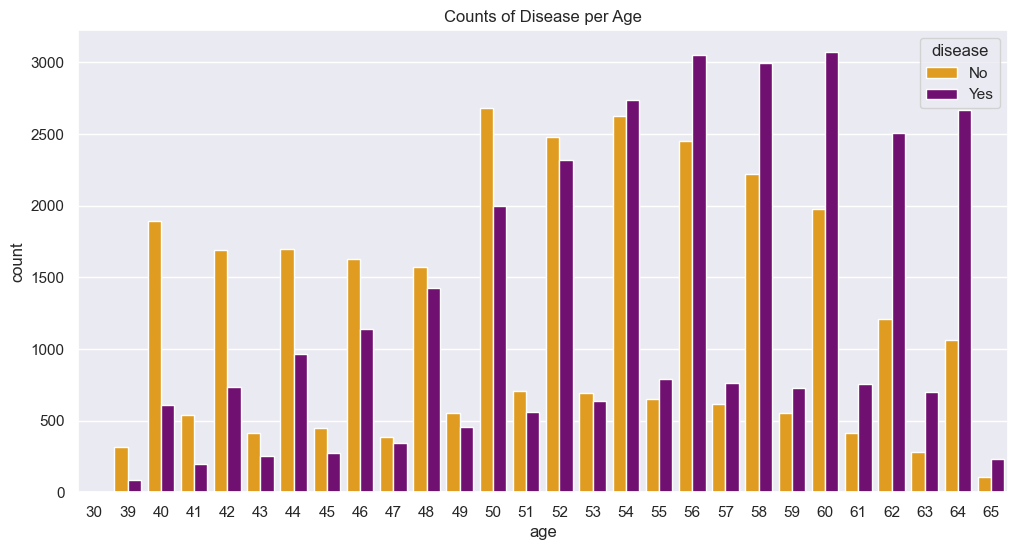

In [38]:
fig, axs = plt.subplots(figsize = (12, 6))

colors = ['orange', 'purple']
sns.countplot(data = df, x = 'age', hue = 'disease', palette = colors, ax = axs)
axs.set(title = "Counts of Disease per Age")
plt.show()

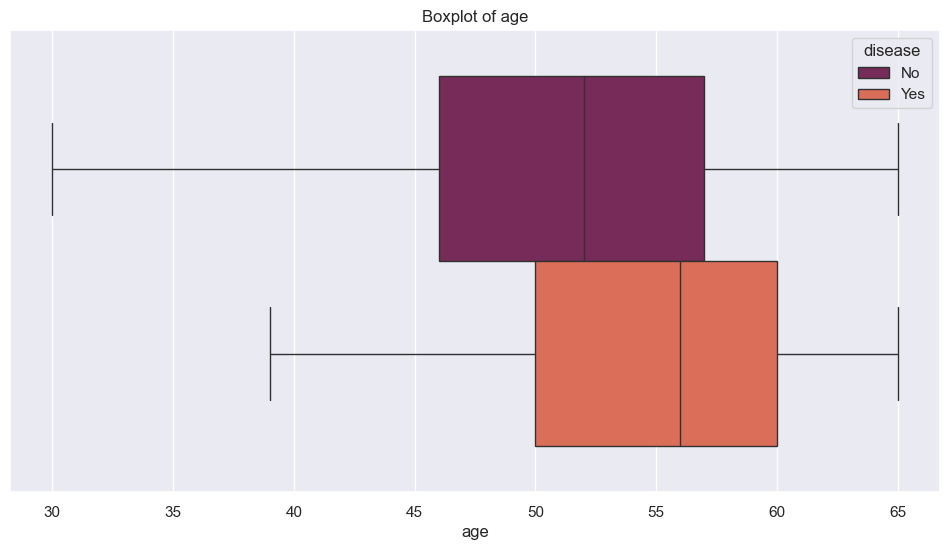

In [39]:
fig, axs = plt.subplots(figsize = (12, 6))

sns.boxplot(data = df, x = 'age', hue = 'disease', palette = 'rocket')
axs.set(title = "Boxplot of age")
plt.show()

We can conduct hypothesis testing to test for association, through comparison of means:

H_0: The mean age in the disease group is equal to the mean age in non disease group <br>
H_A: The mean age in the disease group is not equal to the mean age in non disease group

**From chatgpt**: While a normality test (e.g., Shapiro-Wilk) suggests that the age variable is not perfectly normally distributed, this does not invalidate the use of a t-test in this case. The reason is grounded in the Central Limit Theorem (CLT).

The t-test is concerned with the distribution of sample means, not the raw distribution of the individual age values. According to the CLT, when the sample size is sufficiently large (typically n â‰¥ 30), the sampling distribution of the mean becomes approximately normal, regardless of the underlying data distribution.

In this analysis, both the disease and non-disease groups have sample sizes well above this threshold. Therefore, the CLT justifies the use of parametric tests like the t-test, even though the raw age values are not perfectly normally distributed.

In [40]:
# welch's test when variances are not equal

t_stat, p_value = stats.ttest_ind(df[df['disease'] == 'Yes']['age'], df[df['disease'] == 'No']['age'], equal_var = False)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3e}")

T-statistic: 61.697, p-value: 0.000e+00


A t-test was conducted, just to practice for myself the concepts, it is pretty clear from the chart that the people with CVD tend to have a higher age than those without the disease. With the t-test we can conclude that there is a statistical siginificant difference in the mean age of people with CVD and those without CVD, at a 5% siginifance level. Individuals with CVD have a statistically higher mean age compared to individuals without CVD.

### 2. BMI

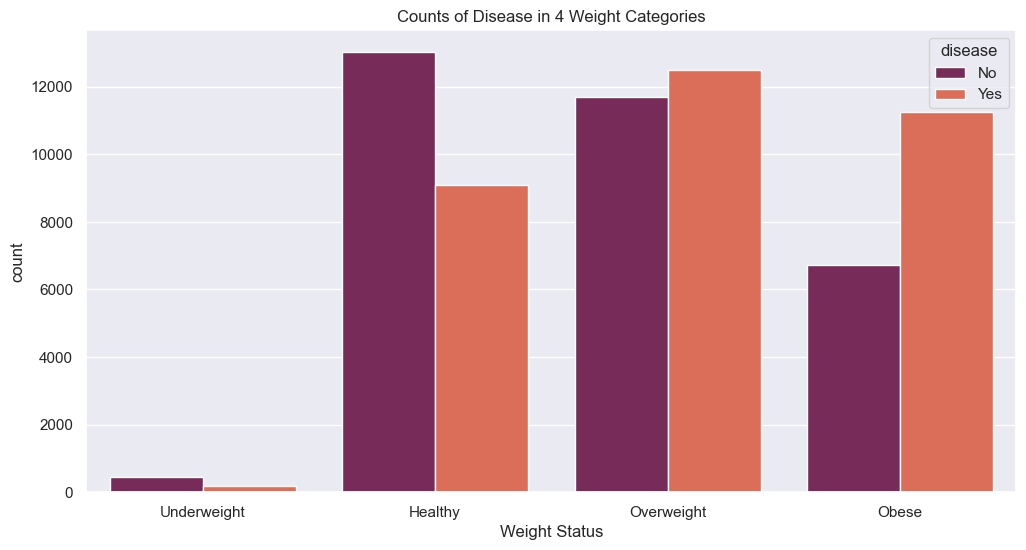

In [41]:
fig, ax = plt.subplots(figsize = (12, 6))
bmi_order = ['Underweight', 'Healthy', 'Overweight', 'Obese']

sns.countplot(data = df, x = 'weight status', hue = 'disease', order = bmi_order, palette = 'rocket')
ax.set(title = 'Counts of Disease in 4 Weight Categories', xlabel = 'Weight Status')
plt.show()

### 3. Smoking

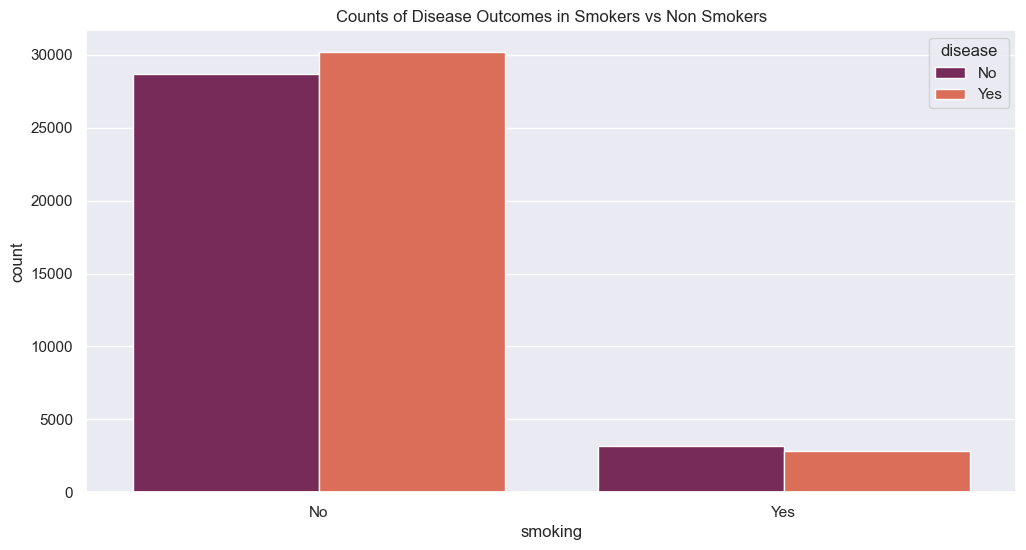

In [42]:
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = df, x = 'smoking', hue = 'disease', palette = 'rocket')
ax.set(title = "Counts of Disease Outcomes in Smokers vs Non Smokers")
plt.show()

We want to test whether smoking is associated with CVD:
H_0: There is no association between smoking and CVD
H_A: There is an association between smoking and CVD

Smoking is a categrical and binary variable here so we use a Chi-Squared test and then calculate the Odds ratio to quantify the association between smoking and disease outcome.

In [43]:
ct = pd.crosstab(df['smoking'], df['disease'])
print(ct)

disease     No    Yes
smoking              
No       28698  30182
Yes       3188   2831


In [44]:
test = stats.chi2_contingency(ct)

print(f"Chi-squared statistic {test.statistic:.3f}, p-value = {test.pvalue:.3e}")

Chi-squared statistic 38.849, p-value = 4.579e-10


In [45]:
a, b, c, d = ct.loc['Yes', 'Yes'], ct.loc['Yes', 'No'], ct.loc['No', 'Yes'], ct.loc['No', 'No']
print(a)
print(b)
print(c)
print(d)
odds_ratio = (a * d) / (b * c)
print(f"Odds ratio = {odds_ratio:.2f}")

2831
3188
30182
28698
Odds ratio = 0.84


This tells us smoking is slightly negatively associated with CVD.

### 4. Blood Pressure

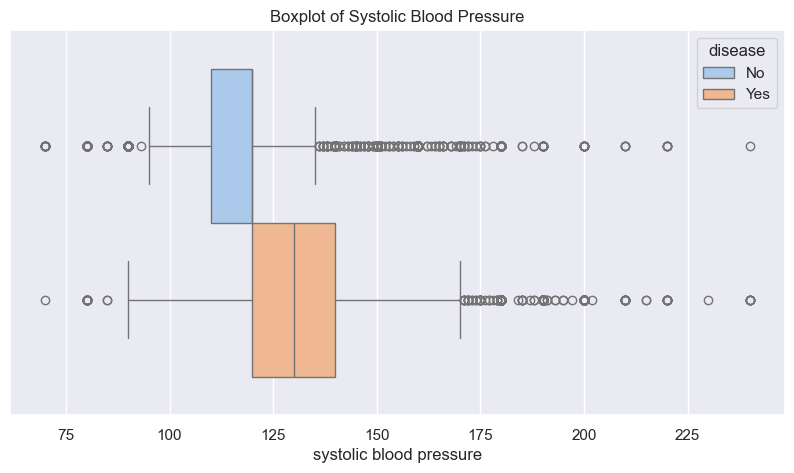

In [46]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.boxplot(data = df, x = 'systolic blood pressure', hue = 'disease', palette = 'pastel')
ax.set(title = "Boxplot of Systolic Blood Pressure")
plt.show()

In [47]:
df[df['disease'] == 'No']['systolic blood pressure'].describe()

count    31886.000000
mean       119.604215
std         13.117719
min         70.000000
25%        110.000000
50%        120.000000
75%        120.000000
max        240.000000
Name: systolic blood pressure, dtype: float64

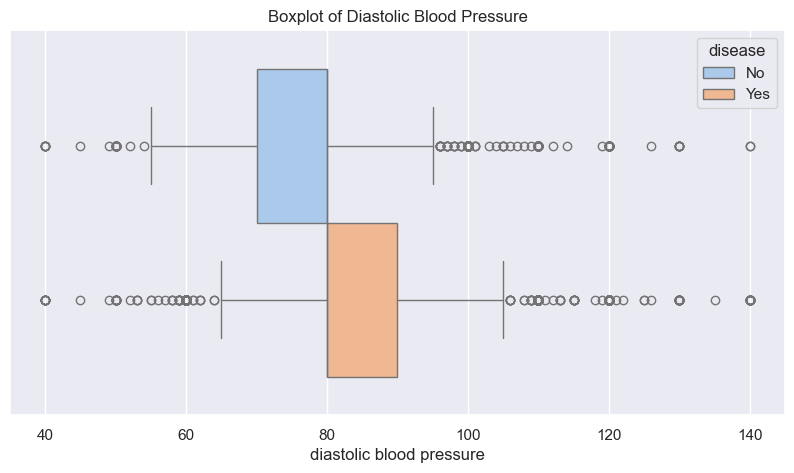

In [48]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.boxplot(data = df, x = 'diastolic blood pressure', hue = 'disease', palette = 'pastel')
ax.set(title = "Boxplot of Diastolic Blood Pressure")
plt.show()

In [49]:
df[df['disease'] == 'Yes']['diastolic blood pressure'].describe()

count    33013.000000
mean        84.690637
std          9.757972
min         40.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        140.000000
Name: diastolic blood pressure, dtype: float64

In [50]:
df[df['disease'] == 'No']['diastolic blood pressure'].describe()

count    31886.000000
mean        78.088315
std          8.526745
min         40.000000
25%         70.000000
50%         80.000000
75%         80.000000
max        140.000000
Name: diastolic blood pressure, dtype: float64

### 5. Cholesterol

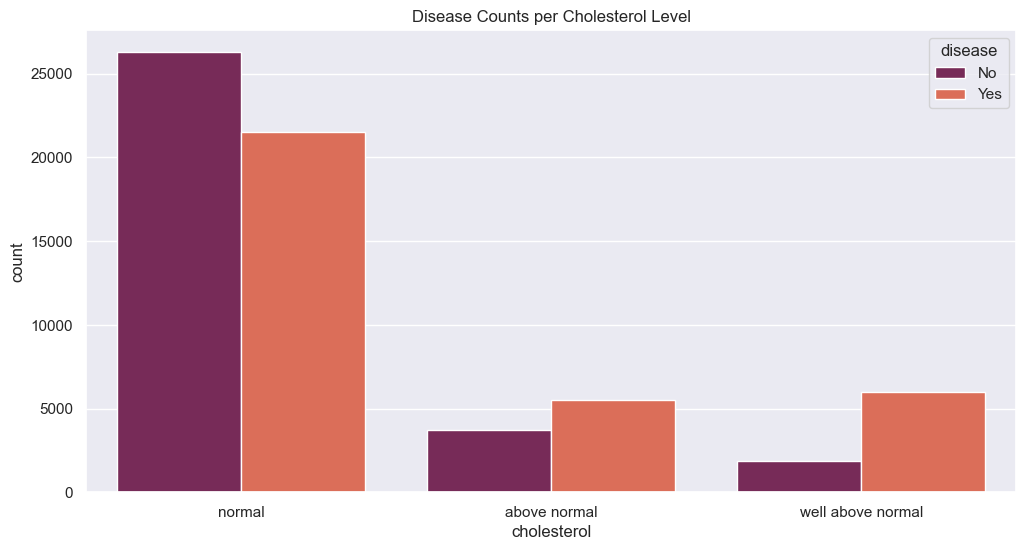

In [51]:
fig, ax = plt.subplots(figsize = (12, 6))

order = ['normal', 'above normal', 'well above normal']
sns.countplot(data = df, x = 'cholesterol', order = order, hue = 'disease', palette = 'rocket')
ax.set(title = 'Disease Counts per Cholesterol Level')
plt.show()

### 6. Glucose

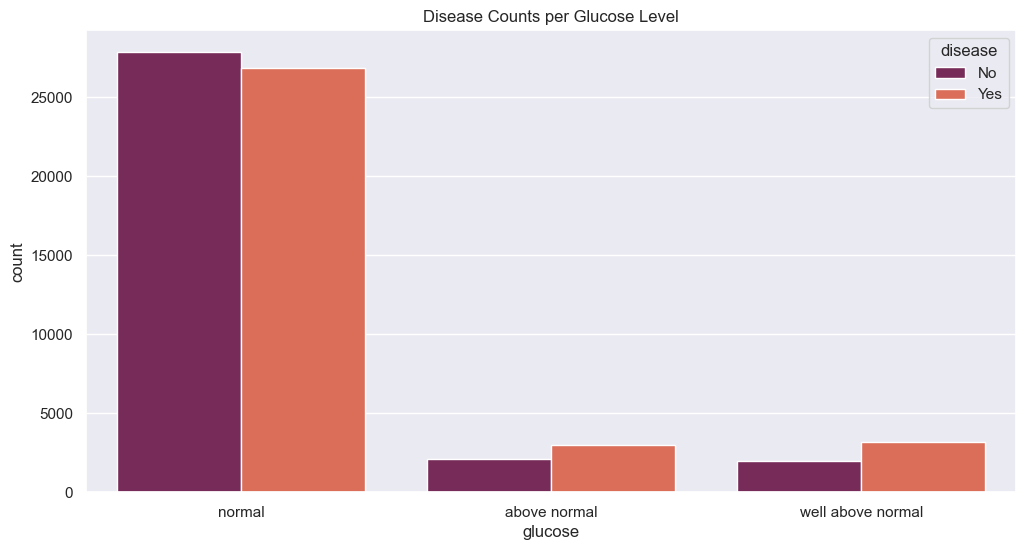

In [70]:
fig, ax = plt.subplots(figsize = (12, 6))

#order = ['normal', 'above normal', 'well above normal']
sns.countplot(data = df, x = 'glucose', hue = 'disease', palette = 'rocket')
ax.set(title = 'Disease Counts per Glucose Level')
plt.show()

### 7. Physical Activity

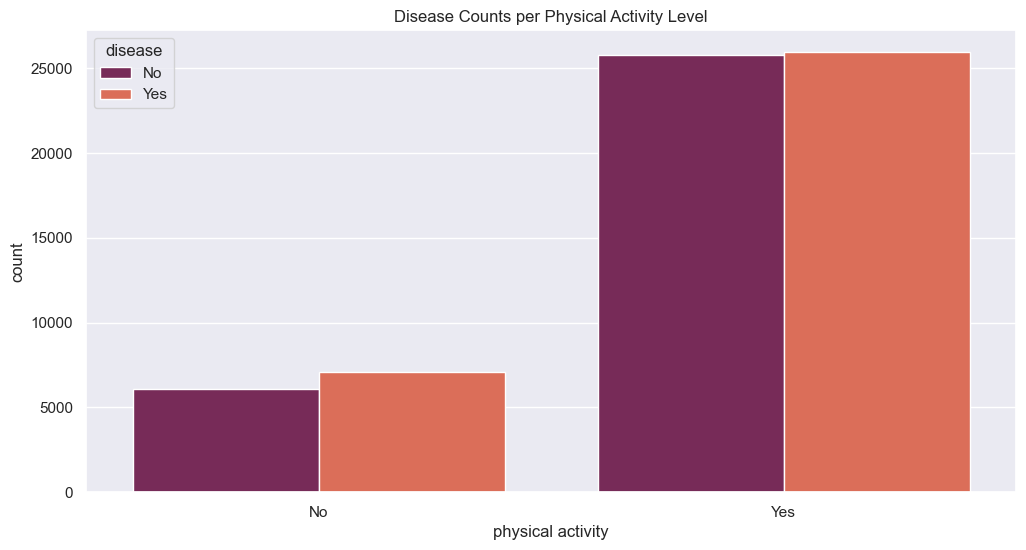

In [52]:
fig, ax = plt.subplots(figsize = (12, 6))

order = ['No', 'Yes']
sns.countplot(data = df, x = 'physical activity', order = order, hue = 'disease', palette = 'rocket')
ax.set(title = 'Disease Counts per Physical Activity Level')
plt.show()

In [53]:
ct = pd.crosstab(df['physical activity'], df['disease'])
print(ct)

disease               No    Yes
physical activity              
No                  6091   7074
Yes                25795  25939


In [54]:
test = stats.chi2_contingency(ct)

print(f"Chi-squared statistic {test.statistic:.3f}, p-value = {test.pvalue:.3e}")

Chi-squared statistic 54.101, p-value = 1.905e-13


In [55]:
a, b, c, d = ct.loc['Yes', 'Yes'], ct.loc['Yes', 'No'], ct.loc['No', 'Yes'], ct.loc['No', 'No']
print(a)
print(b)
print(c)
print(d)
odds_ratio = (a * d) / (b * c)
print(f"Odds ratio = {odds_ratio:.2f}")

25939
25795
7074
6091
Odds ratio = 0.87


## Multivariate Analysis

In [56]:
df.dtypes

age                           int64
gender                       object
height                        int64
weight                      float64
systolic blood pressure       int64
diastolic blood pressure      int64
cholesterol                  object
glucose                      object
smoking                      object
alcohol                      object
physical activity            object
disease                      object
bmi                         float64
weight status                object
dtype: object

### **Numerical Attributes**

In [66]:
num_cols = df.select_dtypes(exclude = 'object')
corr = num_cols.corr(method='pearson')

age    height    weight  \
age                       1.000000 -0.086539  0.053232   
height                   -0.086539  1.000000  0.302754   
weight                    0.053232  0.302754  1.000000   
systolic blood pressure   0.210112  0.018944  0.264076   
diastolic blood pressure  0.153954  0.036625  0.250146   
bmi                       0.099203 -0.225172  0.849612   

                          systolic blood pressure  diastolic blood pressure  \
age                                      0.210112                  0.153954   
height                                   0.018944                  0.036625   
weight                                   0.264076                  0.250146   
systolic blood pressure                  1.000000                  0.707929   
diastolic blood pressure                 0.707929                  1.000000   
bmi                                      0.256206                  0.233050   

                               bmi  
age                       0.099203  
height                   -0.225172  
weight                    0.849612  
systolic blood pressure   0.256206  
diastolic blood pressure  0.233050  
bmi                       1.000000

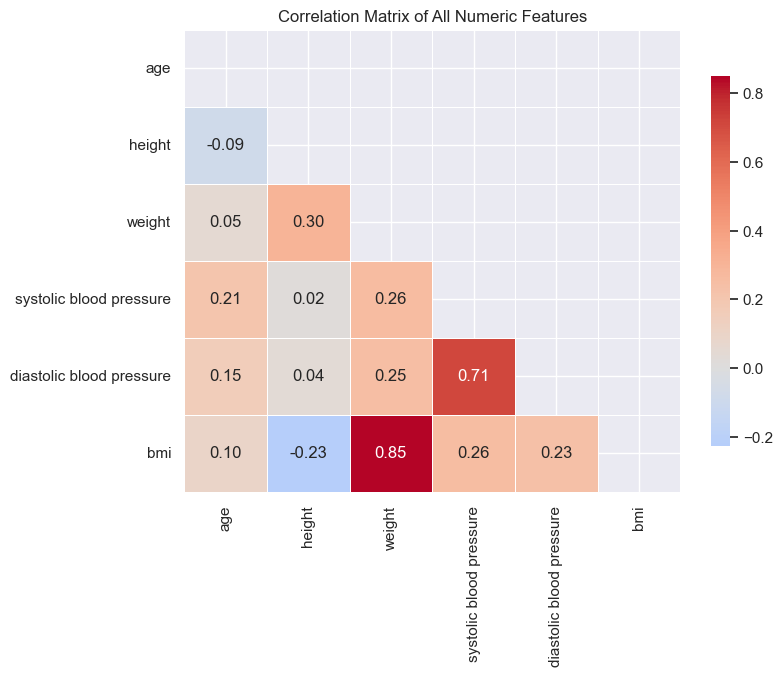

In [61]:

mask = np.triu(np.ones_like(corr, dtype=bool))   # hide upper triangle

lab = ['age', 'height', 'weight', 'bmi', 'sbp', 'dbp']
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,      # show numbers
    fmt=".2f",       # two decimal places
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of All Numeric Features")
#plt.tight_layout()
plt.show()

#### **Observations**

- Weight and BMI are strongly correlated since BMI depends on weight.
- Blood pressures are also correlated

### **Categorical Attributes**

In [63]:
cat_cols = df.select_dtypes(include = 'object')
cat_cols.head()

gender        cholesterol glucose smoking alcohol physical activity disease  \
0    Men             normal  normal      No      No               Yes      No   
1  Women  well above normal  normal      No      No               Yes     Yes   
2  Women  well above normal  normal      No      No                No     Yes   
3    Men             normal  normal      No      No               Yes     Yes   
4  Women             normal  normal      No      No                No      No   

  weight status  
0       Healthy  
1         Obese  
2       Healthy  
3    Overweight  
4       Healthy

Can calculate Cramer's V association measure to produce a heatmap of correlations for categorical attributes. Requires me to build a function though, i.e. not built in like .corr()